In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Importing all the needed libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#loading the data

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Eatery_TrainingData.csv')

In [6]:
df

,id,average_cost_for_two,book_url,cuisines,currency,establishment_types__establishment_type__id,establishment_types__establishment_type__name,featured_image,has_online_delivery,has_table_booking,...,price_range,switch_to_order_menu,thumb,user_rating__custom_rating_text,user_rating__custom_rating_text_background,user_rating__rating_text,user_rating__rating_tool_tip,user_rating__votes,zomato_events,Zomato_user_rating
0,18888,60,NaN,"Pizza, Kiwi",NZ$,7,Bar,https://b.zmtcdn.com/data/res_imagery/7100254_...,0,0,...,3,0,https://b.zmtcdn.com/data/res_imagery/7100254_...,NaN,NaN,Good,NaN,26,NaN,3.7
1,14145,240,NaN,American,R,16,Casual Dining,https://b.zmtcdn.com/data/res_imagery/6402311_...,0,0,...,3,0,https://b.zmtcdn.com/data/res_imagery/6402311_...,NaN,NaN,Good,NaN,214,NaN,3.6
2,28502,475,NaN,Italian,MYR,18,Fine Dining,NaN,0,0,...,4,0,NaN,NaN,NaN,Good,NaN,13,NaN,3.8
3,23643,15,NaN,"Petiscos, Finger Food, Beverages",€,4,Kiosk,https://b.zmtcdn.com/data/reviews_photos/9bc/b...,0,0,...,2,0,https://b.zmtcdn.com/data/reviews_photos/9bc/b...,NaN,NaN,Good,NaN,17,NaN,3.7
4,12767,300,NaN,Healthy Food,P,4,Kiosk,https://b.zmtcdn.com/data/reviews_photos/a7b/0...,0,0,...,1,0,https://b.zmtcdn.com/data/reviews_photos/a7b/0...,NaN,NaN,Average,NaN,14,NaN,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24021,31739,100,NaN,"Indian, South Indian",AED,16,Casual Dining,https://b.zmtcdn.com/data/res_imagery/17839414...,0,0,...,3,0,https://b.zmtcdn.com/data/res_imagery/17839414...,NaN,NaN,Very Good,NaN,90,NaN,4.0
24022,5883,400,NaN,Australian,$,18,Fine Dining,https://b.zmtcdn.com/data/res_imagery/18482717...,0,0,...,4,0,https://b.zmtcdn.com/data/res_imagery/18482717...,NaN,NaN,Excellent,NaN,3,NaN,4.7
24023,912,400,NaN,"Chinese, North Indian",Rs.,21,Quick Bites,https://b.zmtcdn.com/data/res_imagery/18621243...,1,0,...,2,0,https://b.zmtcdn.com/data/res_imagery/18621243...,NaN,NaN,Average,NaN,369,NaN,3.4
24024,16884,35,NaN,"Pakistani, Indian, Afghani, Curry",£,16,Casual Dining,NaN,0,0,...,2,0,NaN,NaN,NaN,Very Good,NaN,55,NaN,4.2


In [7]:
#This dataset contains 24026 rows and 39 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24026 entries, 0 to 24025
Data columns (total 39 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id                                             24026 non-null  int64  
 1   average_cost_for_two                           24026 non-null  int64  
 2   book_url                                       534 non-null    object 
 3   cuisines                                       24012 non-null  object 
 4   currency                                       23941 non-null  object 
 5   establishment_types__establishment_type__id    24026 non-null  int64  
 6   establishment_types__establishment_type__name  24026 non-null  object 
 7   featured_image                                 14351 non-null  object 
 8   has_online_delivery                            24026 non-null  int64  
 9   has_table_booking                              240

In [9]:
#Info function will provide the non null records and datatypes of the data.

In [10]:
df.isna().sum()/len(df)*100

id                                                0.000000
average_cost_for_two                              0.000000
book_url                                         97.777408
cuisines                                          0.058270
currency                                          0.353783
establishment_types__establishment_type__id       0.000000
establishment_types__establishment_type__name     0.000000
featured_image                                   40.268875
has_online_delivery                               0.000000
has_table_booking                                 0.000000
include_bogo_offers                               0.000000
is_book_form_web_view                             0.091567
is_delivering_now                                 0.000000
is_table_reservation_supported                    0.000000
is_zomato_book_res                                0.091567
location__address                                 0.004162
location__city                                    0.0000

In [11]:
#6 of the columns from dataset has more than 90% null values which we can not fill using fill method.

In [12]:
df.drop(['book_url','medio_provider','user_rating__custom_rating_text','user_rating__custom_rating_text_background','user_rating__rating_tool_tip','zomato_events'],axis=1,inplace=True)

In [13]:
#Dropping the unwanted columns

In [14]:
df.isnull().sum()/len(df)*100


id                                                0.000000
average_cost_for_two                              0.000000
cuisines                                          0.058270
currency                                          0.353783
establishment_types__establishment_type__id       0.000000
establishment_types__establishment_type__name     0.000000
featured_image                                   40.268875
has_online_delivery                               0.000000
has_table_booking                                 0.000000
include_bogo_offers                               0.000000
is_book_form_web_view                             0.091567
is_delivering_now                                 0.000000
is_table_reservation_supported                    0.000000
is_zomato_book_res                                0.091567
location__address                                 0.004162
location__city                                    0.000000
location__city_id                                 0.0000

In [15]:
#Unique values from dataframe

In [16]:
for i in df:
  print(i)
  print(df[i].unique())

id
[18888 14145 28502 ...   912 16884 25172]
average_cost_for_two
[     60     240     475      15     300      25   50000   40000      30
      70    1100      55      50     200     150   15000      35   20000
      20     400      75     450      40   35000     220      80      45
     310   18000     600      90       0  550000     250     500      12
      10  135000     350  250000     140     100    1800  180000     800
      65     700     110     120  600000   42000     360     270    2200
  450000     160  200000    1000  300000     650    6000     550   24000
  225000    3500    2000     180     230   60000     260  400000      14
   27000   90000     280  500000     125   80000  100000     105     190
  125000     145       5     130  120000    4000  750000     750  130000
    1300   75000    1200     135      85       8  150000  350000   10000
    1500   25000     640    1700   30000     215     900  190000     165
  800000    7000  650000    1600     235     340     592  

In [17]:
df.drop(['id','thumb','offers','featured_image'],axis=1,inplace=True)

In [18]:
df.isna().sum()/len(df)*100

average_cost_for_two                              0.000000
cuisines                                          0.058270
currency                                          0.353783
establishment_types__establishment_type__id       0.000000
establishment_types__establishment_type__name     0.000000
has_online_delivery                               0.000000
has_table_booking                                 0.000000
include_bogo_offers                               0.000000
is_book_form_web_view                             0.091567
is_delivering_now                                 0.000000
is_table_reservation_supported                    0.000000
is_zomato_book_res                                0.091567
location__address                                 0.004162
location__city                                    0.000000
location__city_id                                 0.000000
location__country_id                              0.000000
location__latitude                                0.0000

In [19]:
for i in df:
  print('------')
  print(i)
  print("  ")
  print(df[i].unique())

------
average_cost_for_two
  
[     60     240     475      15     300      25   50000   40000      30
      70    1100      55      50     200     150   15000      35   20000
      20     400      75     450      40   35000     220      80      45
     310   18000     600      90       0  550000     250     500      12
      10  135000     350  250000     140     100    1800  180000     800
      65     700     110     120  600000   42000     360     270    2200
  450000     160  200000    1000  300000     650    6000     550   24000
  225000    3500    2000     180     230   60000     260  400000      14
   27000   90000     280  500000     125   80000  100000     105     190
  125000     145       5     130  120000    4000  750000     750  130000
    1300   75000    1200     135      85       8  150000  350000   10000
    1500   25000     640    1700   30000     215     900  190000     165
  800000    7000  650000    1600     235     340     592     170    8000
    2500       6    

In [20]:
#Heatmap - corelation of numerical data

In [21]:
df['Zomato_user_rating']=df['Zomato_user_rating'].astype('int')

In [22]:
df['Zomato_user_rating'].unique()

array([3, 4, 0, 2, 1])

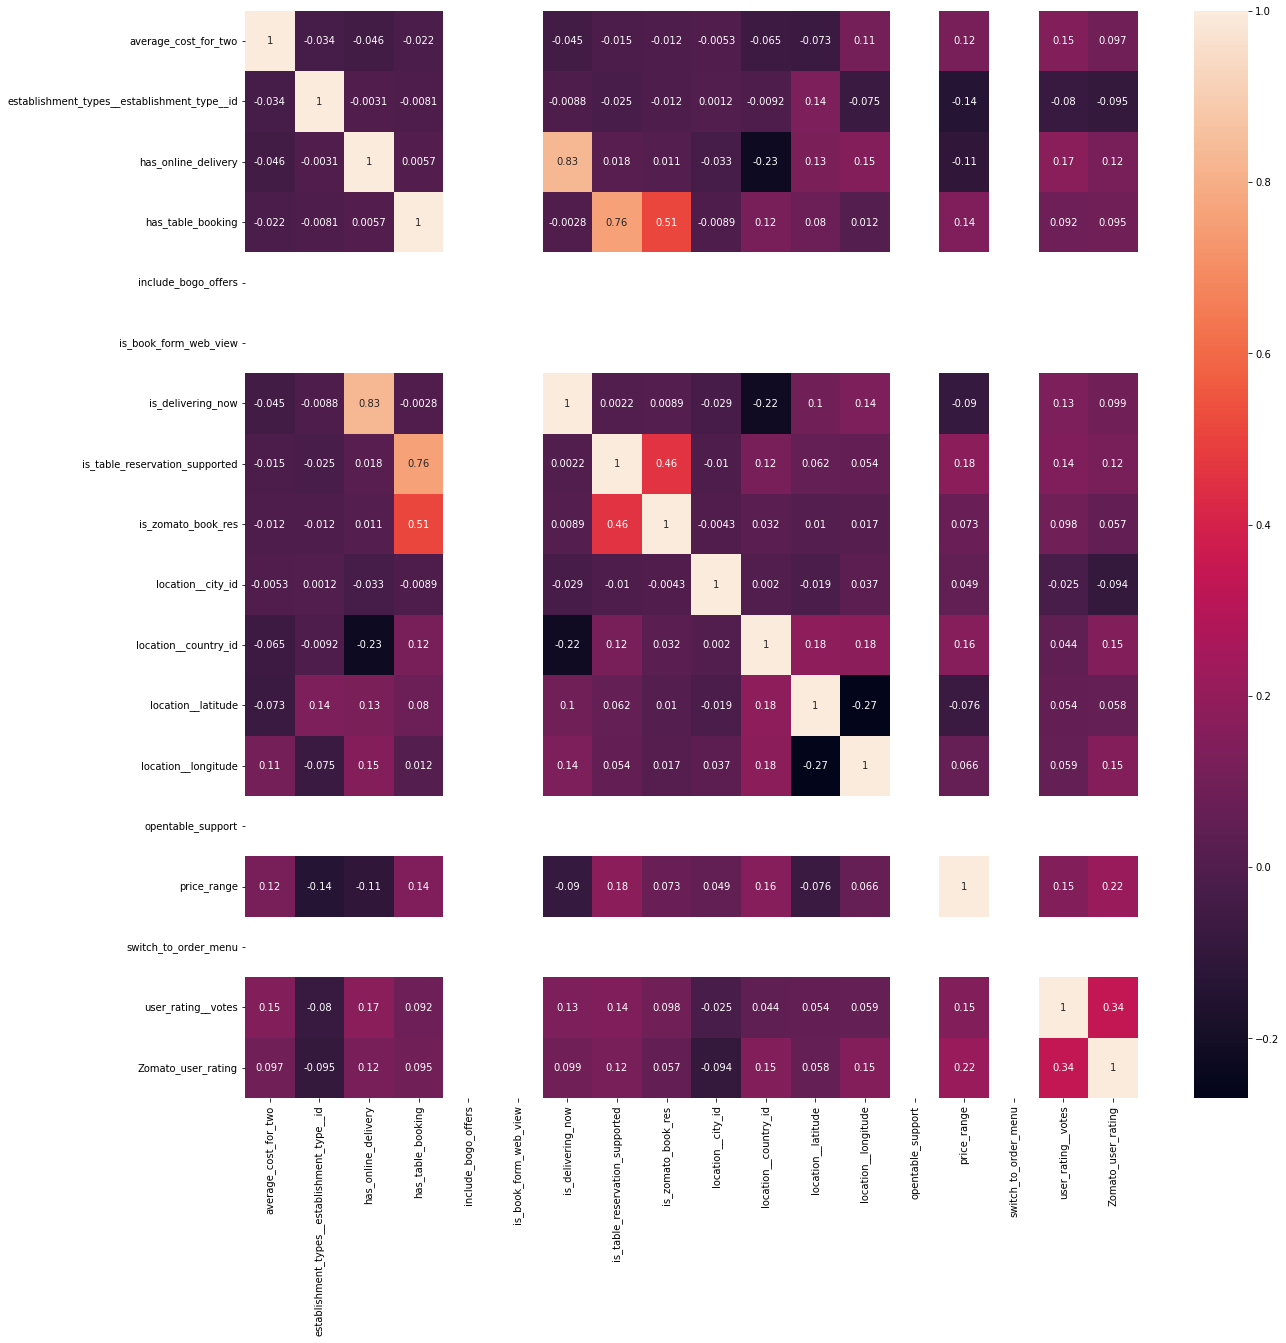

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
df.describe()

,average_cost_for_two,establishment_types__establishment_type__id,has_online_delivery,has_table_booking,is_book_form_web_view,is_delivering_now,is_table_reservation_supported,is_zomato_book_res,location__city_id,location__country_id,location__latitude,location__longitude,opentable_support,price_range,switch_to_order_menu,user_rating__votes,Zomato_user_rating
count,2.402600e+04,24026.000000,24026.000000,24026.000000,24004.0,24026.000000,24026.000000,24004.000000,24026.000000,24026.000000,24026.000000,24026.000000,24004.0,24026.000000,24026.0,24026.000000,24026.000000
mean,1.123696e+04,25.345501,0.122451,0.022226,0.0,0.087655,0.027345,0.005874,94.563931,126.845168,14.025617,40.929221,0.0,2.464372,0.0,98.533089,2.702364
std,7.048641e+04,49.483151,0.327812,0.147421,0.0,0.282798,0.163091,0.076418,545.494480,78.441268,30.411370,64.095444,0.0,1.039771,0.0,211.481835,1.346435
min,0.000000e+00,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,32.000000,1.000000,-43.623872,-123.108080,0.0,1.000000,0.0,0.000000,0.000000
25%,3.500000e+01,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,58.000000,37.000000,-12.992547,-2.247167,0.0,2.000000,0.0,4.000000,3.000000
50%,9.000000e+01,18.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,67.000000,148.000000,24.431988,35.525165,0.0,2.000000,0.0,24.000000,3.000000
75%,4.000000e+02,23.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,82.000000,208.000000,39.898147,79.838045,0.0,3.000000,0.0,96.000000,4.000000
max,3.500000e+06,292.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,11080.000000,215.000000,73.990002,175.662804,0.0,4.000000,0.0,5376.000000,4.000000


In [25]:
df.isnull().sum()/len(df)*100

average_cost_for_two                              0.000000
cuisines                                          0.058270
currency                                          0.353783
establishment_types__establishment_type__id       0.000000
establishment_types__establishment_type__name     0.000000
has_online_delivery                               0.000000
has_table_booking                                 0.000000
include_bogo_offers                               0.000000
is_book_form_web_view                             0.091567
is_delivering_now                                 0.000000
is_table_reservation_supported                    0.000000
is_zomato_book_res                                0.091567
location__address                                 0.004162
location__city                                    0.000000
location__city_id                                 0.000000
location__country_id                              0.000000
location__latitude                                0.0000

In [27]:
df['name']

0        Brooklyn Bar & Bistro
1               Franky's Diner
2         Favola - Le Meridien
3                 DejaVu Plaza
4                       Tossed
                 ...          
24021                Nalukettu
24022               Whitegrass
24023             Desi Chullha
24024                   Nawaab
24025                    Tanta
Name: name, Length: 24026, dtype: object

In [28]:
df.drop(['location__zipcode'],axis=1,inplace=True)

In [29]:
#Dropping the null value less than 5%

In [30]:
df.dropna(inplace=True)

In [31]:
df.isna().sum()/len(df)*100

average_cost_for_two                             0.0
cuisines                                         0.0
currency                                         0.0
establishment_types__establishment_type__id      0.0
establishment_types__establishment_type__name    0.0
has_online_delivery                              0.0
has_table_booking                                0.0
include_bogo_offers                              0.0
is_book_form_web_view                            0.0
is_delivering_now                                0.0
is_table_reservation_supported                   0.0
is_zomato_book_res                               0.0
location__address                                0.0
location__city                                   0.0
location__city_id                                0.0
location__country_id                             0.0
location__latitude                               0.0
location__locality                               0.0
location__locality_verbose                    

In [32]:
#Splitting categorical columns

In [33]:
cat_cols=df.select_dtypes(include=['O'])
cat_cols

,cuisines,currency,establishment_types__establishment_type__name,location__address,location__city,location__locality,location__locality_verbose,mezzo_provider,name,user_rating__rating_text
0,"Pizza, Kiwi",NZ$,Bar,"55 Cleveland Street, Brooklyn, Wellington City",Wellington City,Brooklyn,"Brooklyn, Wellington City",OTHER,Brooklyn Bar & Bistro,Good
2,Italian,MYR,Fine Dining,"Level Eleven, Le Meridien, 2, Jalan Stesen Sen...",Kuala Lumpur,Le Meridien,"Le Meridien, Kuala Lumpur",OTHER,Favola - Le Meridien,Good
3,"Petiscos, Finger Food, Beverages",€,Kiosk,"Praça Duque de Saldanha, Saldanha, Lisboa",Lisboa,Saldanha,"Saldanha, Lisboa",OTHER,DejaVu Plaza,Good
4,Healthy Food,P,Kiosk,"Third Floor, Main Mall, SM Mall of Asia, Mall ...",Pasay City,"Main Mall, SM Mall of Asia, Mall of Asia Compl...","Main Mall, SM Mall of Asia, Mall of Asia Compl...",OTHER,Tossed,Average
5,"Portuguese, Finger Food, Beverages",€,Pub,"Rua do Século, 178, Príncipe Real, Lisboa",Lisboa,Príncipe Real,"Príncipe Real, Lisboa",OTHER,Snob Bar,Very Good
...,...,...,...,...,...,...,...,...,...,...
24021,"Indian, South Indian",AED,Casual Dining,"Holiday Beach Club, Ajman Beach, Ajman Cornich...",Ajman,Ajman Corniche,"Ajman Corniche, Ajman",OTHER,Nalukettu,Very Good
24022,Australian,$,Fine Dining,"Chijmes, 30 Victoria Street, #01-26/27 187996",Singapore,"Victoria Street, Museum","Victoria Street, Museum, Singapore",OTHER,Whitegrass,Excellent
24023,"Chinese, North Indian",Rs.,Quick Bites,"Plot 10, Near Purti Bazaar, Besa Road, Manish ...",Nagpur,Manish Nagar,"Manish Nagar, Nagpur",OTHER,Desi Chullha,Average
24024,"Pakistani, Indian, Afghani, Curry",£,Casual Dining,"1008 Stockport Road, Levenshulme, Manchester M...",Manchester,Levenshulme,"Levenshulme, Manchester",OTHER,Nawaab,Very Good


In [34]:
#Splitting numerical columns

In [35]:
num_cols=df.select_dtypes(include=['int','float'])
num_cols

,average_cost_for_two,establishment_types__establishment_type__id,has_online_delivery,has_table_booking,is_book_form_web_view,is_delivering_now,is_table_reservation_supported,is_zomato_book_res,location__city_id,location__country_id,location__latitude,location__longitude,opentable_support,price_range,switch_to_order_menu,user_rating__votes,Zomato_user_rating
0,60,7,0,0,0.0,0,0,0.0,71,148,-41.305333,174.763500,0.0,3,0,26,3
2,475,18,0,0,0.0,0,0,0.0,88,123,3.135924,101.686354,0.0,4,0,13,3
3,15,4,0,0,0.0,0,0,0.0,82,164,38.733511,-9.143674,0.0,2,0,17,3
4,300,4,0,0,0.0,0,0,0.0,63,162,14.535570,120.981812,0.0,1,0,14,3
5,25,6,0,0,0.0,0,0,0.0,82,164,38.715102,-9.147563,0.0,3,0,132,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24021,100,16,0,0,0.0,0,0,0.0,92,214,25.402411,55.427275,0.0,3,0,90,4
24022,400,18,0,0,0.0,0,0,0.0,52,184,1.295542,103.852000,0.0,4,0,3,4
24023,400,21,1,0,0.0,0,0,0.0,33,1,21.088071,79.084903,0.0,2,0,369,3
24024,35,16,0,0,0.0,0,0,0.0,68,215,53.441833,-2.189833,0.0,2,0,55,4


In [36]:
#Unique values from numerical columns

In [37]:
for i in num_cols:
  print(i)
  print(df[i].unique())

average_cost_for_two
[     60     475      15     300      25   50000   40000      30      70
    1100      55      50     200     150   15000      35   20000      20
     400      75     450      40   35000     220      80      45     310
   18000     600      90       0  550000     250     500      12      10
  135000     350  250000     140     100    1800  180000     240     800
      65     700     110     120  600000   42000     360     270    2200
  450000     160  200000    1000  300000     650    6000     550   24000
  225000    3500    2000     180     230   60000     260  400000      14
   27000   90000     280  500000     125   80000  100000     105     190
  125000     145       5     130  120000    4000  750000     750  130000
    1300   75000    1200     135      85       8  150000  350000   10000
    1500   25000     640    1700   30000     215     900  190000     165
  800000    7000  650000    1600     235     340     592     170    8000
    2500       6      16     3

In [38]:
#Unique values from categorical columns

In [39]:
for i in cat_cols:
  print(i)
  print(df[i].unique())

cuisines
['Pizza, Kiwi' 'Italian' 'Petiscos, Finger Food, Beverages' ...
 'Tapas, Canadian' 'Portuguese, Finger Food, Cafe, Desserts'
 'Pakistani, Indian, Afghani, Curry']
currency
['NZ$' 'MYR' '€' 'P' 'LBP' '£' 'AED' 'Rs.' 'R' 'QR' 'R$' 'TL' '$' 'Kč'
 'IDR' 'LKR']
establishment_types__establishment_type__name
['Bar' 'Fine Dining' 'Kiosk' 'Pub' 'Café' 'Lounge' 'Casual Dining'
 'Bistro' 'Quick Bites' 'Dessert Parlour' 'Beverage Shop' 'Bakery'
 'Food Court' 'Club' 'Pop up' 'Food Truck' 'Wine Bar' 'Dhaba'
 'Microbrewery' 'Sandwich Shop' 'Sweet Shop' 'Cocktail Bar' 'Beer Garden']
location__address
['55 Cleveland Street, Brooklyn, Wellington City'
 'Level Eleven, Le Meridien, 2, Jalan Stesen Sentral, Brickfields, Kuala Lumpur 50470'
 'Praça Duque de Saldanha, Saldanha, Lisboa' ...
 'Plot 10, Near Purti Bazaar, Besa Road, Manish Nagar, Nagpur'
 '1008 Stockport Road, Levenshulme, Manchester M19 3WN'
 'Mall Alto Las Condes, Av. Presidente Kennedy 9001, Piso 3, Mirador del Alto, Local 3240, Las

In [40]:
df.drop(['is_book_form_web_view','switch_to_order_menu','location__address','user_rating__rating_text','currency','location__city_id','location__country_id','opentable_support'],axis=1,inplace=True)

In [41]:
df.sample(7)

,average_cost_for_two,cuisines,establishment_types__establishment_type__id,establishment_types__establishment_type__name,has_online_delivery,has_table_booking,include_bogo_offers,is_delivering_now,is_table_reservation_supported,is_zomato_book_res,location__city,location__latitude,location__locality,location__locality_verbose,location__longitude,mezzo_provider,name,price_range,user_rating__votes,Zomato_user_rating
2730,10000,"Beverages, Juices",41,Beverage Shop,0,0,True,0,0,0.0,Aley District,33.808495,Aley,"Aley, Aley District",35.597597,OTHER,Ittihad Cocktail,1,17,3
22606,140,"Seafood, Cantonese, Chinese",16,Casual Dining,0,0,True,0,0,0.0,Toronto,43.824070,"Steeles Avenue East, Scarborough","Steeles Avenue East, Scarborough, Toronto",-79.300858,OTHER,Fishman Lobster Clubhouse,4,176,4
6092,200,"Italian, Brazilian",18,Fine Dining,0,0,True,0,0,0.0,Rio de Janeiro,-22.983833,Leblon,"Leblon, Rio de Janeiro",-43.221167,OTHER,Degrau,4,5,4
16016,70,Turkish,21,Quick Bites,0,0,True,0,0,0.0,İstanbul,40.980528,Moda,"Moda, İstanbul",29.023958,OTHER,Moda Van Kahvaltı,3,250,3
20119,240,"Healthy Food, American",16,Casual Dining,1,0,True,1,1,0.0,Abu Dhabi,24.499668,"The Galleria, Al Maryah Island","The Galleria, Al Maryah Island, Abu Dhabi",54.387040,OTHER,Nolu's Downtown,4,359,4
23531,60,Juices,41,Beverage Shop,1,0,True,1,0,0.0,Abu Dhabi,24.406398,Al Maqtaa,"Al Maqtaa, Abu Dhabi",54.517743,OTHER,Just Fresh Juice,2,11,3
13231,120,Desserts,4,Kiosk,0,0,True,0,0,0.0,Pasay City,14.534735,"Entertainment Mall, SM Mall of Asia, Mall of A...","Entertainment Mall, SM Mall of Asia, Mall of A...",120.980369,OTHER,Famous Belgian Waffles,1,9,3


In [42]:
df.drop(['establishment_types__establishment_type__id','location__locality_verbose'],axis=1,inplace=True)

In [43]:
df.sample(10)

,average_cost_for_two,cuisines,establishment_types__establishment_type__name,has_online_delivery,has_table_booking,include_bogo_offers,is_delivering_now,is_table_reservation_supported,is_zomato_book_res,location__city,location__latitude,location__locality,location__longitude,mezzo_provider,name,price_range,user_rating__votes,Zomato_user_rating
4861,140000,Vietnamese,Food Court,0,0,True,0,0,0.0,Jakarta,-6.266524,"Pondok Indah Mall 1, Pondok Indah",106.784672,OTHER,Pho 24,2,45,3
15075,35,Korean,Food Court,0,0,True,0,0,0.0,Auckland,-36.845150,"Food Alley, Auckland CBD",174.764738,OTHER,Seoul Seoul 서울 서울,2,21,3
13124,400,"Mediterranean, Seafood",Fine Dining,0,0,True,0,1,0.0,Abu Dhabi,24.557933,"Saadiyat Beach Club, Saadiyat Island",54.450146,OTHER,Safina,4,42,3
8765,25,Malay,Food Truck,0,0,True,0,0,0.0,Kuala Lumpur,3.160491,TAPAK,101.715672,OTHER,Nasi Lemak Sayang Pojie - TAPAK,3,0,0
2469,500,Cafe,Café,1,0,True,0,0,0.0,Nagpur,21.108888,Pratap Nagar,79.061932,OTHER,Yo Cafe,2,30,2
14794,400,"Seafood, Mediterranean, Grill",Fine Dining,0,0,True,0,0,0.0,Cape Town,-33.903456,V & A Waterfront,18.420622,OTHER,Seelan,4,139,3
18339,20,Drinks Only,Beer Garden,0,0,True,0,0,0.0,London,51.476739,Camberwell,-0.094227,OTHER,The Nag's Head,2,1,3
4155,600,"Pizza, Fast Food, American",Food Court,0,0,True,0,0,0.0,Taguig City,14.532662,"Venice Grand Canal Mall, McKinley Hill, Taguig...",121.051649,OTHER,S&R New York Style Pizza,2,31,3
18704,60,Desserts,Dessert Parlour,0,0,True,0,0,0.0,Sharjah,25.324948,Industrial Area,55.436143,OTHER,Krispy Kreme,3,15,3
1239,30,"Arabian, Middle Eastern",Quick Bites,0,0,True,0,0,0.0,Ajman,25.401120,Al Jurf,55.503424,OTHER,Fatayer Station,1,9,3


In [44]:
for i in df:
  print(i)
  print(df[i].unique())

average_cost_for_two
[     60     475      15     300      25   50000   40000      30      70
    1100      55      50     200     150   15000      35   20000      20
     400      75     450      40   35000     220      80      45     310
   18000     600      90       0  550000     250     500      12      10
  135000     350  250000     140     100    1800  180000     240     800
      65     700     110     120  600000   42000     360     270    2200
  450000     160  200000    1000  300000     650    6000     550   24000
  225000    3500    2000     180     230   60000     260  400000      14
   27000   90000     280  500000     125   80000  100000     105     190
  125000     145       5     130  120000    4000  750000     750  130000
    1300   75000    1200     135      85       8  150000  350000   10000
    1500   25000     640    1700   30000     215     900  190000     165
  800000    7000  650000    1600     235     340     592     170    8000
    2500       6      16     3

In [45]:
df.drop(['location__latitude','location__longitude'],axis=1,inplace=True)

In [46]:
df.shape

(23904, 16)

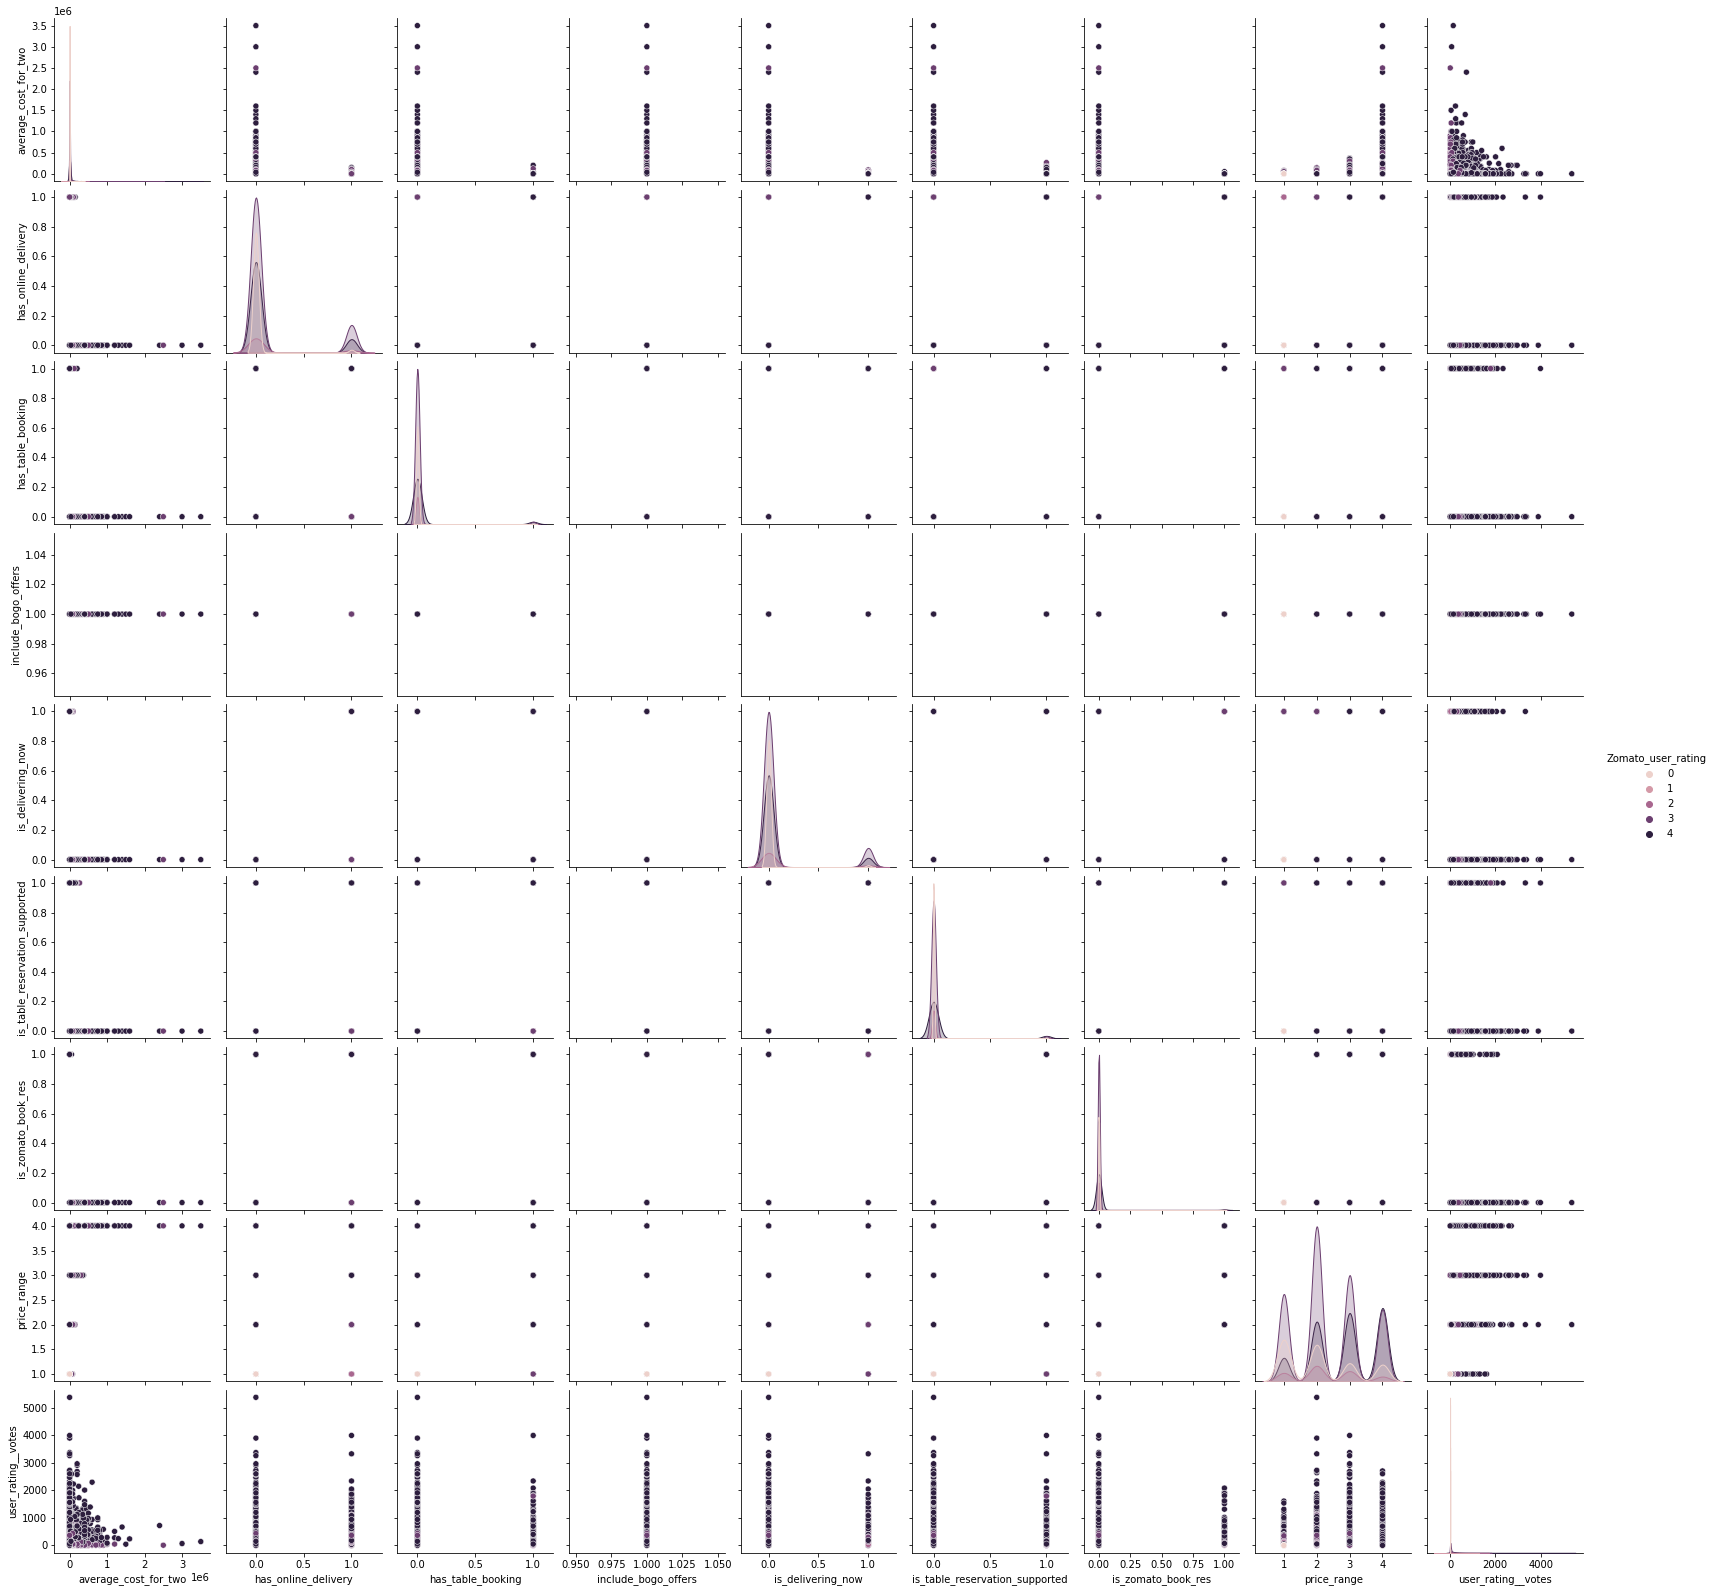

In [47]:
sns.pairplot(data=df,hue='Zomato_user_rating')

In [208]:
#Target Variable

In [209]:
df['Zomato_user_rating'].value_counts()

3    11506
4     6819
0     4052
2     1525
1        2
Name: Zomato_user_rating, dtype: int64

<AxesSubplot:xlabel='Zomato_user_rating', ylabel='count'>

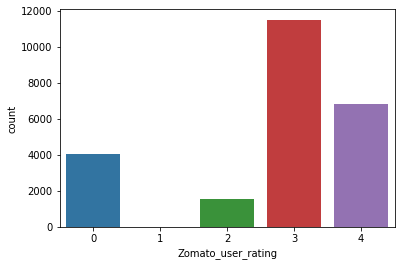

In [210]:
sns.countplot(df['Zomato_user_rating'])

In [255]:
#As the dataset is highly imbalance we convert it into Low, Medium and High i.e 0,1,and 2

In [256]:
df['Zomato_user_rating']=df['Zomato_user_rating'].replace(0,0)

In [257]:
df['Zomato_user_rating']=df['Zomato_user_rating'].replace(1,0)

In [258]:
df['Zomato_user_rating']=df['Zomato_user_rating'].replace(2,1)

In [259]:
df['Zomato_user_rating']=df['Zomato_user_rating'].replace(3,1)

In [260]:
df['Zomato_user_rating']=df['Zomato_user_rating'].replace(4,2)

In [264]:
df['Zomato_user_rating'].unique()

array([1, 2, 0])

<AxesSubplot:xlabel='Zomato_user_rating', ylabel='count'>

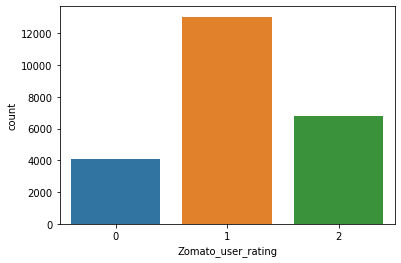

In [265]:
sns.countplot(df['Zomato_user_rating'])

In [48]:
#Converting categorical data to numerical

In [266]:
from sklearn.preprocessing import OrdinalEncoder

In [267]:
oe=OrdinalEncoder()

In [268]:
for i in df.select_dtypes(include='O'):
  df[i]=oe.fit_transform(df[[i]])

In [269]:
df.sample(10)

,average_cost_for_two,cuisines,establishment_types__establishment_type__name,has_online_delivery,has_table_booking,include_bogo_offers,is_delivering_now,is_table_reservation_supported,is_zomato_book_res,location__city,location__locality,mezzo_provider,name,price_range,user_rating__votes,Zomato_user_rating
6973,20000,4818.0,1.0,0,0,True,0,0,0.0,78.0,3744.0,1.0,418.0,2,35,1
23300,250,540.0,19.0,1,0,True,1,0,0.0,48.0,2645.0,1.0,5166.0,1,34,1
9907,12000,2444.0,12.0,0,0,True,0,0,0.0,78.0,1232.0,1.0,9604.0,2,46,1
1150,80,3560.0,11.0,0,0,True,0,0,0.0,15.0,3577.0,1.0,14187.0,4,10,1
7903,25,2506.0,18.0,0,0,True,0,0,0.0,24.0,3467.0,1.0,2158.0,2,3,0
16591,100,1294.0,5.0,0,0,True,0,0,0.0,72.0,712.0,1.0,9386.0,4,1,0
15382,170,667.0,18.0,0,0,True,0,0,0.0,98.0,2642.0,1.0,16871.0,4,56,1
6878,120,949.0,11.0,0,0,True,0,0,0.0,39.0,3047.0,1.0,12821.0,4,240,2
19656,105000,4438.0,11.0,0,0,True,0,0,0.0,33.0,4634.0,1.0,493.0,3,89,1
654,100,2178.0,1.0,0,0,True,0,0,0.0,98.0,2497.0,1.0,6253.0,3,122,1


In [270]:
df.dtypes

average_cost_for_two                               int64
cuisines                                         float64
establishment_types__establishment_type__name    float64
has_online_delivery                                int64
has_table_booking                                  int64
include_bogo_offers                                 bool
is_delivering_now                                  int64
is_table_reservation_supported                     int64
is_zomato_book_res                               float64
location__city                                   float64
location__locality                               float64
mezzo_provider                                   float64
name                                             float64
price_range                                        int64
user_rating__votes                                 int64
Zomato_user_rating                                 int64
dtype: object

In [271]:
#Splitting the data in X and y

In [272]:
X=df.iloc[:,:-1].values
X

array([[60, 4247.0, 1.0, ..., 2524.0, 3, 26],
       [475, 3231.0, 11.0, ..., 5956.0, 4, 13],
       [15, 4182.0, 14.0, ..., 4859.0, 2, 17],
       ...,
       [400, 1722.0, 19.0, ..., 4942.0, 2, 369],
       [35, 4113.0, 6.0, ..., 11340.0, 2, 55],
       [37000, 4161.0, 11.0, ..., 15618.0, 3, 152]], dtype=object)

In [273]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, ..., 1, 2, 2])

In [274]:
#scaling the data

In [275]:
from sklearn.preprocessing import StandardScaler

In [276]:
sc=StandardScaler()

In [277]:
X=sc.fit_transform(X)

In [278]:
#Performing train test split on data 

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [281]:
#importing neural network libraries

In [282]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [283]:
from tensorflow.keras.callbacks import EarlyStopping

In [284]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [285]:
#initializing the model

In [286]:
ann=Sequential()

In [287]:
#Adding layers to the model

In [288]:
ann.add(Dense(units=35,activation='relu'))

In [289]:
ann.add(Dense(units=35,activation='relu'))

In [290]:
ann.add(Dense(units=35,activation='relu'))

In [291]:
ann.add(Dense(units=35,activation='relu'))

In [292]:
#Output layer

In [293]:
ann.add(Dense(5,activation="softmax"))

In [294]:
#specify the loss function, optimizer, and metrics using compile.

In [295]:
ann.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [296]:
#fitting the model

In [297]:
ann.fit(X_train,y_train,epochs=400,validation_data=(X_test, y_test),verbose=2,batch_size=100,callbacks=[early_stop])

Epoch 1/400
192/192 - 3s - loss: 0.9154 - accuracy: 0.6118 - val_loss: 0.7387 - val_accuracy: 0.6685 - 3s/epoch - 16ms/step
Epoch 2/400
192/192 - 1s - loss: 0.7060 - accuracy: 0.6685 - val_loss: 0.6628 - val_accuracy: 0.6896 - 576ms/epoch - 3ms/step
Epoch 3/400
192/192 - 1s - loss: 0.6485 - accuracy: 0.6909 - val_loss: 0.6398 - val_accuracy: 0.6919 - 595ms/epoch - 3ms/step
Epoch 4/400
192/192 - 1s - loss: 0.6167 - accuracy: 0.7074 - val_loss: 0.5982 - val_accuracy: 0.7279 - 591ms/epoch - 3ms/step
Epoch 5/400
192/192 - 1s - loss: 0.5933 - accuracy: 0.7195 - val_loss: 0.5915 - val_accuracy: 0.7231 - 587ms/epoch - 3ms/step
Epoch 6/400
192/192 - 1s - loss: 0.5795 - accuracy: 0.7305 - val_loss: 0.5671 - val_accuracy: 0.7354 - 522ms/epoch - 3ms/step
Epoch 7/400
192/192 - 1s - loss: 0.5731 - accuracy: 0.7293 - val_loss: 0.5556 - val_accuracy: 0.7448 - 590ms/epoch - 3ms/step
Epoch 8/400
192/192 - 1s - loss: 0.5590 - accuracy: 0.7413 - val_loss: 0.5520 - val_accuracy: 0.7429 - 590ms/epoch - 3ms

In [298]:
#making a data frame of models loss history

In [299]:
loss_df=pd.DataFrame(ann.history.history)

In [300]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.915384,0.611829,0.738657,0.668479
1,0.705966,0.668514,0.662834,0.689605
2,0.648520,0.690896,0.639786,0.691905
3,0.616735,0.707420,0.598215,0.727881
4,0.593318,0.719500,0.591460,0.723071
...,...,...,...,...
153,0.402660,0.814151,0.466442,0.782054
154,0.400244,0.815772,0.476360,0.780172
155,0.395381,0.819432,0.463463,0.789165
156,0.395745,0.820060,0.470406,0.786237


In [301]:
#Plotting the loss of model

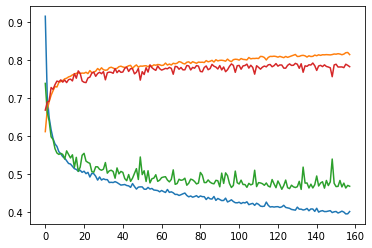

In [302]:
plt.plot(loss_df)
plt.show()

In [303]:
#Importing Classification metrics

In [304]:
from sklearn.metrics import classification_report

In [305]:
#Predicting the value 

In [306]:
yprob=ann.predict(X_test)

150/150 [==============================] - 0s 2ms/step


In [307]:
ypred=yprob.argmax(axis=1)

In [308]:
#Checking Classification report 

In [309]:
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       814
           1       0.79      0.83      0.81      2599
           2       0.73      0.69      0.71      1368

    accuracy                           0.78      4781
   macro avg       0.79      0.77      0.78      4781
weighted avg       0.78      0.78      0.78      4781



In [310]:
#Converting actual and predicted value into DataFrame

In [311]:
pd.DataFrame({"Actual value":y_test,"predicted value":ypred,"Act-pred":y_test-ypred})

,Actual value,predicted value,Act-pred
0,2,2,0
1,1,1,0
2,1,1,0
3,1,2,-1
4,2,2,0
...,...,...,...
4776,1,1,0
4777,1,1,0
4778,1,2,-1
4779,1,2,-1
